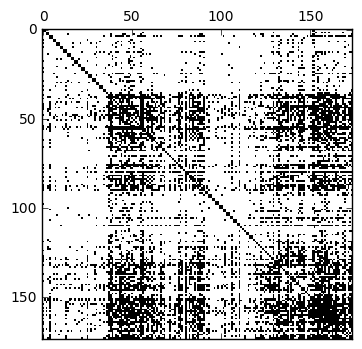

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np

data = np.loadtxt('cal500',delimiter = ',')
data.shape
with open('label2.txt') as f:
    label = f.readlines()

A = data[:,-len(label):]
np.rint(A)

B = np.dot(A.transpose(),A)
B.shape

C = (B==0)
ExclMat = C.astype(int) 
for i in range(0,174): 
    for j in range(0,174):
        if i==j:
            ExclMat[i,j]=1
            
plt.spy(ExclMat) 
plt.show()


In [79]:
bal_ratio = np.zeros((ExclMat.shape))
acc_1 = np.zeros((ExclMat.shape))

for i in range(ExclMat.shape[0]):
    for j in range(ExclMat.shape[1]):
        if ExclMat[i,j] != 0 and i!= j:
            bal_ratio[i,j] = round(4*float(sum(A[:,i])*sum(A[:,j]))/ 502/502,2)
print bal_ratio


[[ 0.    0.24  0.   ...,  0.    0.01  0.  ]
 [ 0.24  0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.01  0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]]


In [80]:
T =bal_ratio

for k in range(100):
    i,j = np.unravel_index(T.argmax(), T.shape)
    print i,j, T[i,j]
    print label[i],label[j]
    T[i,j]=0
    T[j,i]=0;

6 7 0.36
"EmotionCalmingSoothing01"
"NOTEmotionCalmingSoothing01"

32 33 0.34
"EmotionTenderSoft01"
"NOTEmotionTenderSoft01"

99 100 0.34
"SongHighEnergy01"
"NOTSongHighEnergy01"

8 21 0.32
"EmotionCarefreeLighthearted01"
"NOTEmotionLightPlayful01"

10 11 0.31
"EmotionCheerfulFestive01"
"NOTEmotionCheerfulFestive01"

16 17 0.29
"EmotionHappy01"
"NOTEmotionHappy01"

95 96 0.29
"SongFastTempo01"
"NOTSongFastTempo01"

18 19 0.28
"EmotionLaidbackMellow01"
"NOTEmotionLaidbackMellow01"

22 23 0.28
"EmotionLovingRomantic01"
"NOTEmotionLovingRomantic01"

14 15 0.27
"EmotionExcitingThrilling01"
"NOTEmotionExcitingThrilling01"

20 21 0.27
"EmotionLightPlayful01"
"NOTEmotionLightPlayful01"

116 117 0.27
"SongVeryDanceable01"
"NOTSongVeryDanceable01"

8 9 0.26
"EmotionCarefreeLighthearted01"
"NOTEmotionCarefreeLighthearted01"

22 35 0.26
"EmotionLovingRomantic01"
"NOTEmotionTouchingLoving01"

34 35 0.26
"EmotionTouchingLoving01"
"NOTEmotionTouchingLoving01"

7 32 0.25
"NOTEmotionCalmingSoothing01"

In [103]:
cluster_List = [[i] for i in range(ExclMat.shape[0])]
for _ in range(len(cluster_List)):
    max_sim = 0
    max_i = []
    max_j =[]
    fusion_ij = []
    for i in range(len(cluster_List)):
        for j in range(i+1, len(cluster_List)):
            class_i = np.sum(A[:,cluster_List[i]],axis = 1)
            class_j = np.sum(A[:,cluster_List[j]],axis = 1)
            if np.dot(class_i,class_j) == 0:
                sim = round(4*float((sum(class_i)*sum(class_j))/(sum(class_i)+sum(class_j))),2)
                if sim > max_sim:
                    max_sim = sim 
                    fusion_ij = cluster_List[i]+cluster_List[j]
                    max_i = cluster_List[i]
                    max_j = cluster_List[j]
    if max_sim == 0: 
        break
    cluster_List.remove(max_i)
    cluster_List.remove(max_j)
    cluster_List.append(fusion_ij)
    
cluster_List

[[70],
 [73],
 [79],
 [119],
 [123],
 [127],
 [128],
 [138],
 [166],
 [6, 7],
 [32, 33],
 [8, 21],
 [16, 17],
 [95, 96],
 [10, 11],
 [99, 100],
 [18, 19],
 [2, 3],
 [26, 27],
 [97, 98],
 [22, 23],
 [103, 104],
 [12, 13],
 [24, 25],
 [30, 31],
 [107, 108],
 [0, 1],
 [101, 102],
 [124, 147],
 [93, 94],
 [75, 170],
 [53, 118],
 [81, 133],
 [4, 5],
 [120, 134],
 [164, 72, 157],
 [85, 125],
 [105, 106],
 [57, 135],
 [162, 52, 167],
 [47, 76, 40, 84],
 [140, 126, 141],
 [139, 130, 142],
 [172, 136, 45, 58, 163],
 [109, 110],
 [111, 152],
 [90, 68, 64, 74],
 [69, 155],
 [131, 78, 60, 86],
 [129, 61, 36, 83],
 [37, 20, 49],
 [88, 151, 42, 67, 82],
 [51, 63, 144],
 [48, 112],
 [158, 160, 159, 50, 54, 59, 150],
 [168, 156, 114, 115],
 [41, 146, 145, 148],
 [38, 116, 117],
 [173, 34, 35],
 [137, 14, 15],
 [143, 91, 92],
 [44, 9, 171],
 [80, 77, 122, 161, 153, 62, 149],
 [121, 169],
 [154, 43, 28, 29],
 [55, 165, 39, 66, 65, 71],
 [132, 46, 56, 87, 89, 113]]

In [105]:
np.sort(cluster_List)

array([[0, 1], [2, 3], [4, 5], [6, 7], [8, 21], [10, 11], [12, 13],
       [16, 17], [18, 19], [22, 23], [24, 25], [26, 27], [30, 31],
       [32, 33], [37, 20, 49], [38, 116, 117], [41, 146, 145, 148],
       [44, 9, 171], [47, 76, 40, 84], [48, 112], [51, 63, 144], [53, 118],
       [55, 165, 39, 66, 65, 71], [57, 135], [69, 155], [70], [73],
       [75, 170], [79], [80, 77, 122, 161, 153, 62, 149], [81, 133],
       [85, 125], [88, 151, 42, 67, 82], [90, 68, 64, 74], [93, 94],
       [95, 96], [97, 98], [99, 100], [101, 102], [103, 104], [105, 106],
       [107, 108], [109, 110], [111, 152], [119], [120, 134], [121, 169],
       [123], [124, 147], [127], [128], [129, 61, 36, 83],
       [131, 78, 60, 86], [132, 46, 56, 87, 89, 113], [137, 14, 15], [138],
       [139, 130, 142], [140, 126, 141], [143, 91, 92], [154, 43, 28, 29],
       [158, 160, 159, 50, 54, 59, 150], [162, 52, 167], [164, 72, 157],
       [166], [168, 156, 114, 115], [172, 136, 45, 58, 163], [173, 34, 35]], dtype=o

In [104]:
cluster_List = np.sort(cluster_List)
for i in range(len(cluster_List)):
    temp = np.sort(cluster_List[i])
    for j in range(len(cluster_List[i])):
        print str(temp[j])+label[temp[j]]  
    print str(i+1)+'-th class'+'\n'

0"EmotionAngryAgressive01"

1"NOTEmotionAngryAgressive01"

1-th class

2"EmotionArousingAwakening01"

3"NOTEmotionArousingAwakening01"

2-th class

4"EmotionBizarreWeird01"

5"NOTEmotionBizarreWeird01"

3-th class

6"EmotionCalmingSoothing01"

7"NOTEmotionCalmingSoothing01"

4-th class

8"EmotionCarefreeLighthearted01"

21"NOTEmotionLightPlayful01"

5-th class

10"EmotionCheerfulFestive01"

11"NOTEmotionCheerfulFestive01"

6-th class

12"EmotionEmotionalPassionate01"

13"NOTEmotionEmotionalPassionate01"

7-th class

16"EmotionHappy01"

17"NOTEmotionHappy01"

8-th class

18"EmotionLaidbackMellow01"

19"NOTEmotionLaidbackMellow01"

9-th class

22"EmotionLovingRomantic01"

23"NOTEmotionLovingRomantic01"

10-th class

24"EmotionPleasantComfortable01"

25"NOTEmotionPleasantComfortable01"

11-th class

26"EmotionPositiveOptimistic01"

27"NOTEmotionPositiveOptimistic01"

12-th class

30"EmotionSad01"

31"NOTEmotionSad01"

13-th class

32"EmotionTenderSoft01"

33"NOTEmotionTenderSoft01"

14-th

759.0